# Application of unsupervised learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## I/ Découverte du dataset
Pour cet exercice d'algorithmes non supervisé nous allons travailler sur le dataset de **Sci-Kit Learn** `fetch_lfw_people` (**Labeled Faces in the Wild**) dont la documentation est disponible sur les liens suivants:
- [Documentation de Sci-Kit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html)
- [Site de Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)

**"Labeled Faces in the Wild"** est un dataset regroupant un ensemble de photos de célébrités labellisées, qui sont collectées spécialement pour l'étude du problème de la reconnaissance faciale

In [55]:
people = fetch_lfw_people(min_faces_per_person=30, resize=0.7)
print("Contenu du Dataset")
for key in people.keys():
    print(f"- {key :20} ")

Contenu du Dataset
- data                 
- images               
- target               
- target_names         
- DESCR                


In [56]:
print(people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

Le jeu de données utilisé dans cet exemple est appelé "Labeled Faces in the Wild" (LFW). Il comprend des images de visages de personnes célèbre

Il serait intéressant de faire du clustering sur des visages pour plusieurs raisons :
- Identifier automatiquement des groupes ou des sous-groupes de visages similaires.
- Révéler des structures et des similitudes intéressantes parmi les visages, en regroupant les visages qui partagent des caractéristiques communes
- Explorer et visualiser les données


## II/ Analyse et prétraitements des données

In [57]:
print(f"Le dataset comporte {people.data.shape[0]} visages.")

Le dataset comporte 2370 visages.


Affichage des données

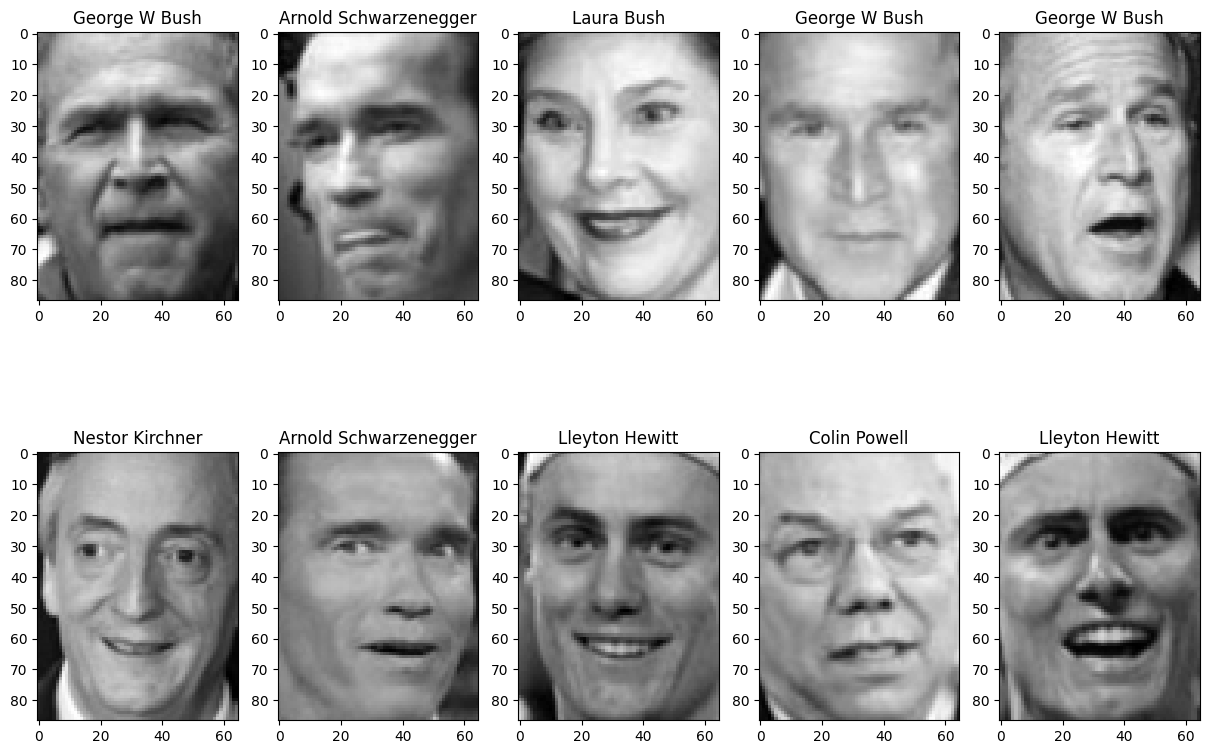

In [58]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(people.target_names[target])

In [59]:
def histo(people, target):
    """
    Affiche un histogramme du nombre de visages par personne
    """
    counts = np.bincount(target)
    # print counts next to target names:
    for i, (count, name) in enumerate(zip(counts, people.target_names)):
        print("{0:25}\t{1:3}".format(name, count), end="\t\t")
        if (i + 1) % 2 == 0:
            print()


histo(people, people.target)

Alejandro Toledo         	 39		Alvaro Uribe             	 35		
Andre Agassi             	 36		Ariel Sharon             	 77		
Arnold Schwarzenegger    	 42		Colin Powell             	236		
David Beckham            	 31		Donald Rumsfeld          	121		
George W Bush            	530		Gerhard Schroeder        	109		
Gloria Macapagal Arroyo  	 44		Guillermo Coria          	 30		
Hans Blix                	 39		Hugo Chavez              	 71		
Jacques Chirac           	 52		Jean Chretien            	 55		
Jennifer Capriati        	 42		John Ashcroft            	 53		
John Negroponte          	 31		Junichiro Koizumi        	 60		
Kofi Annan               	 32		Laura Bush               	 41		
Lleyton Hewitt           	 41		Luiz Inacio Lula da Silva	 48		
Megawati Sukarnoputri    	 33		Nestor Kirchner          	 37		
Recep Tayyip Erdogan     	 30		Roh Moo-hyun             	 32		
Serena Williams          	 52		Silvio Berlusconi        	 33		
Tom Ridge                	 33		Tony Blair              

##### Egalisation des données

Certaines personnalités sont surprésentés dans le jeu de données. Pour éviter que nos algorithmes ne soient biaisés par ces personnalités, nous allons réduire les données de façon à ce qu'elles soietn égales.

In [60]:
median_count = np.median(np.bincount(people.target))
median_count

41.5

In [61]:
select = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    select[np.where(people.target == target)[0][: int(median_count)]] = 1

X_people = people.data[select]
y_people = people.target[select]
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people)
print(f"{X_train.shape = } ")
print(f"{y_train.shape = } ")
print(f"{X_test.shape = } ")
print(f"{y_test.shape = } ")

X_train.shape = (961, 5655) 
y_train.shape = (961,) 
X_test.shape = (321, 5655) 
y_test.shape = (321,) 


In [62]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Andre Agassi', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Colin Powell', 'David Beckham',
       'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Guillermo Coria', 'Hans Blix',
       'Hugo Chavez', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Capriati', 'John Ashcroft', 'John Negroponte',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Megawati Sukarnoputri',
       'Nestor Kirchner', 'Recep Tayyip Erdogan', 'Roh Moo-hyun',
       'Serena Williams', 'Silvio Berlusconi', 'Tom Ridge', 'Tony Blair',
       'Vicente Fox', 'Vladimir Putin'], dtype='<U25')

In [63]:
histo(people, y_people)

Alejandro Toledo         	 39		Alvaro Uribe             	 35		
Andre Agassi             	 36		Ariel Sharon             	 41		
Arnold Schwarzenegger    	 41		Colin Powell             	 41		
David Beckham            	 31		Donald Rumsfeld          	 41		
George W Bush            	 41		Gerhard Schroeder        	 41		
Gloria Macapagal Arroyo  	 41		Guillermo Coria          	 30		
Hans Blix                	 39		Hugo Chavez              	 41		
Jacques Chirac           	 41		Jean Chretien            	 41		
Jennifer Capriati        	 41		John Ashcroft            	 41		
John Negroponte          	 31		Junichiro Koizumi        	 41		
Kofi Annan               	 32		Laura Bush               	 41		
Lleyton Hewitt           	 41		Luiz Inacio Lula da Silva	 41		
Megawati Sukarnoputri    	 33		Nestor Kirchner          	 37		
Recep Tayyip Erdogan     	 30		Roh Moo-hyun             	 32		
Serena Williams          	 41		Silvio Berlusconi        	 33		
Tom Ridge                	 33		Tony Blair              

##### PCA pour une réduction de dimensions

Dans le but de faire une réduction de dimension nous allons appliquer la PCA sur le jeu de données d'entrainement `X_train`. La PCA peut faciliter le processus de clusterisation en réduisant le nombre de dimension. Cela peut aider à améliorer la précision et l'interprétation des clusters obtenus, en mettant en évidence les différences et les similitudes les plus importantes entre les points de données.

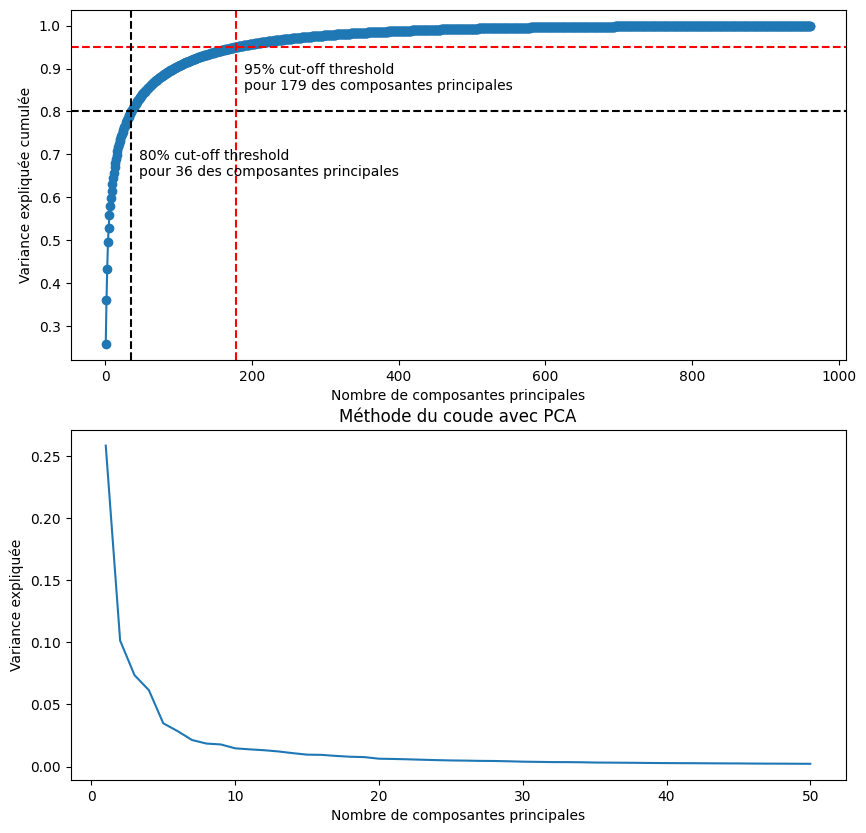

In [64]:
from sklearn.metrics.cluster import v_measure_score

pca = PCA()
pca.fit(X_train)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

variance_threshold = 0.95
n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
n_components_2 = np.argmax(cumulative_variance >= 0.80) + 1

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.axhline(y=variance_threshold, color="r", linestyle="--")
plt.axvline(x=n_components, color="r", linestyle="--")
plt.text(
    n_components + 10,
    0.85,
    f"95% cut-off threshold \npour {n_components} des composantes principales",
    color="black",
)

plt.axhline(y=0.80, color="black", linestyle="--")
plt.axvline(x=n_components_2, color="black", linestyle="--")
plt.text(
    n_components_2 + 10,
    0.65,
    f"80% cut-off threshold \npour {n_components_2} des composantes principales",
    color="black",
)

plt.subplot(2, 1, 2)
plt.plot(range(1, len(explained_variance) + 1)[:50], explained_variance[:50])
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée")
plt.title("Méthode du coude avec PCA")

plt.show()
plt.show()

Ici, un nombre de composantes de 35 est choisi pour la PCA car elles permettent de conserver 80% de la variances des données, de réduire beaucoup les dimensions et de réduire la complexité des données. On peut aussi faire une PCA moins restrictive en choisissant un nombre de composantes plus élévé comme 180 qui conserve 95% de la variance, mais cela augmente la complexité des données.

In [65]:
pca = PCA(n_components=n_components, random_state=0).fit(X_train)


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [66]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target)[:]:
    mask[np.where(people.target == target)[0][:50]] = True
mask

array([ True,  True,  True, ..., False,  True, False])

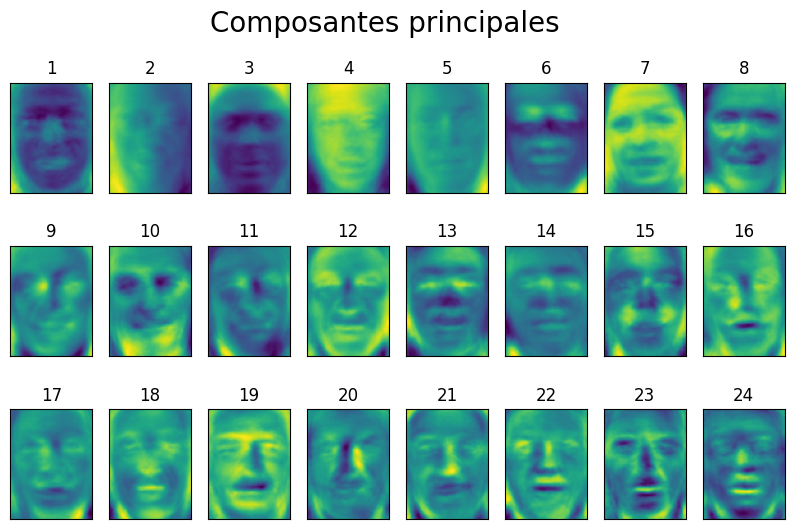

In [67]:
fig, axes = plt.subplots(3, 8, figsize=(10, 6), subplot_kw={"xticks": (), "yticks": ()})
fig.suptitle("Composantes principales", fontsize=20)
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(people.images[0].shape), cmap="viridis")
    ax.set_title(f"{i+1}")

## III/ Application des Algos de Clustering

### A) KMeans

On va essayer de jouer sur le nombre de clusters pour voir si on peut obtenir des résultats intéressants. On va augmenter le nombre de clusters progressivement pour voir quelles carractéristiques sont mises en avant par l'algorithme quand il y a un petit nombre de clusters et quand il y en a un grand nombre.

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


def build_kmeans(nbr_cluster):
    """
    Build a KMeans model with nbr_cluster clusters
    """
    kmeans = KMeans(n_clusters=nbr_cluster, random_state=0)
    kmeans.fit(X_train_pca)
    return kmeans


list_algo = []
list_label = []
list_label_name = []

for i in [3, 5, 10, 20, 30, 50, 100]:
    kmeans = build_kmeans(i)
    list_label.append(kmeans.predict(X_train_pca))
    list_algo.append(kmeans)
    list_label_name.append(f"KMeans {i}")

C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

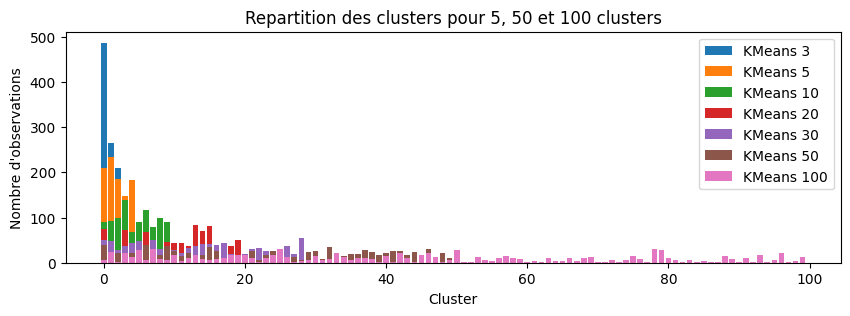

In [69]:
plt.figure(figsize=(10, 3))
for label, name in zip(list_label, list_label_name):
    plt.bar(np.arange(len(np.bincount(label))), np.bincount(label), label=name)
plt.xlabel("Cluster")
plt.ylabel("Nombre d'observations")
plt.legend()
plt.title("Repartition des clusters pour 5, 50 et 100 clusters")
plt.show()

##### Evaluation des clusters

Nous allons évaluer les clusters obtenus par l'algorithme KMeans en utilisant les métriques : 

- **Le Coefficient de Silhouette** qui estime la cohésion des clusters obtenus. Elle est comprise entre -1 et 1. Plus la valeur est proche de 1, plus le clustering est considéré comme de bonne qualité. Une valeur de 0 indique que les clusters se chevauchent.

- **Davies-Bouldin** qui estime la séparation entre les clusters obtenus. Elle est comprise entre 0 et l'infini. Plus la valeur est proche de 0, plus le clustering est considéré comme de bonne qualité. Une valeur élevée indique que les clusters se chevauchent.

- **Calinski-Harabasz** qui estime aussi la séparation entre les clusters obtenus. Elle est comprise entre 0 et l'infini. Plus la valeur est élevée, plus le clustering est considéré comme de bonne qualité. Une valeur élevée indique que les clusters sont denses et bien séparés.

In [70]:
from sklearn.metrics import (
    silhouette_samples,
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

print("Silhouette Score :\t\t Davies Bouldin Score :\t\t Calinski Harabasz Score :")
for label, name in zip(list_label, list_label_name):
    print(f"{name} : {silhouette_score(X_train_pca, label):.3f}", end="\t\t")
    print(f" {name} : {davies_bouldin_score(X_train_pca, label):.3f}", end="\t\t")
    print(f" {name} : {calinski_harabasz_score(X_train_pca, label):.3f}", end="\t\t")
    print()

Silhouette Score :		 Davies Bouldin Score :		 Calinski Harabasz Score :
KMeans 3 : 0.093		 KMeans 3 : 2.597		 KMeans 3 : 136.174		
KMeans 5 : 0.083		 KMeans 5 : 2.657		 KMeans 5 : 95.115		
KMeans 10 : 0.061		 KMeans 10 : 2.644		 KMeans 10 : 58.379		
KMeans 20 : 0.040		 KMeans 20 : 2.718		 KMeans 20 : 34.279		
KMeans 30 : 0.031		 KMeans 30 : 2.697		 KMeans 30 : 25.550		
KMeans 50 : 0.028		 KMeans 50 : 2.599		 KMeans 50 : 17.511		
KMeans 100 : 0.021		 KMeans 100 : 2.044		 KMeans 100 : 10.763		


Parmis tous ces paramètrages de KMeans, les scores de Silhouette sont tous très proches de 0. Cela signifie que les clusters se chevauchent. Cela est surement du à la complexité des données. 

Les scores de Davies-Bouldin sont tous très proches de 1. Cela signifie que les clusters sont très proches les uns des autres, on voit qu'on obtient de meilleur resultat avec le KMEANS 100.

A l'inverse, les scores de Calinski-Harabasz sont plus élévé avec le KMEANS 3

Cela montre la subjectivité du clustering pour ce jeu de données. Il est difficile de déterminer le nombre de clusters optimal et cela dépend de l'objectif de l'analyse.

##### Analyse pour un faible nombre de clusters

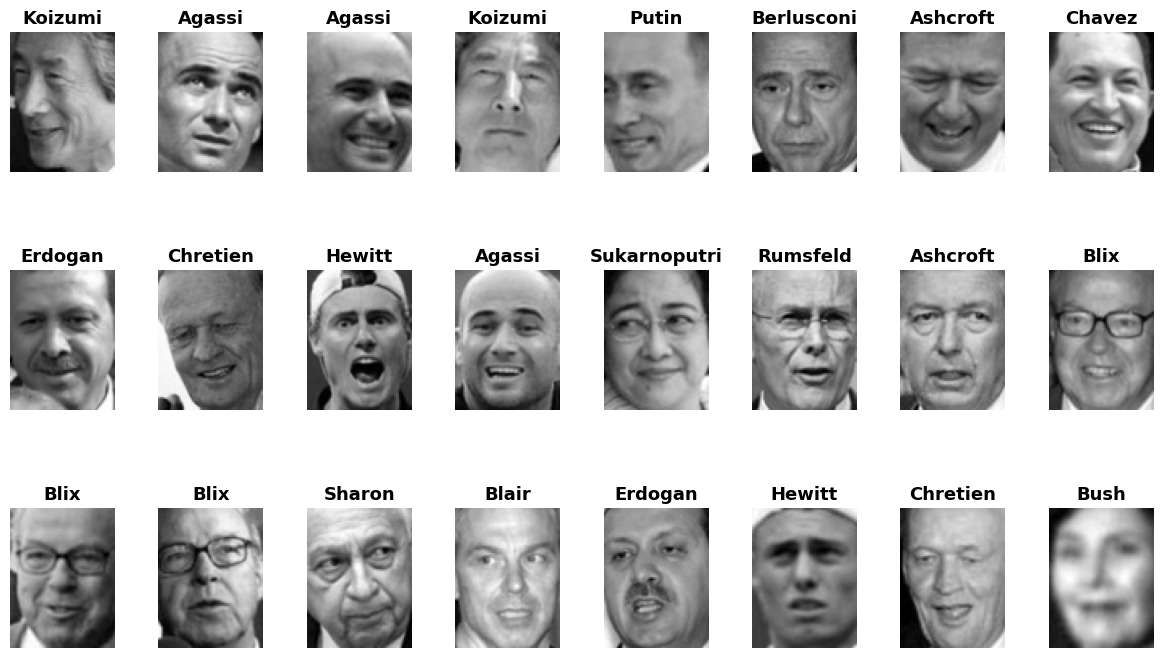

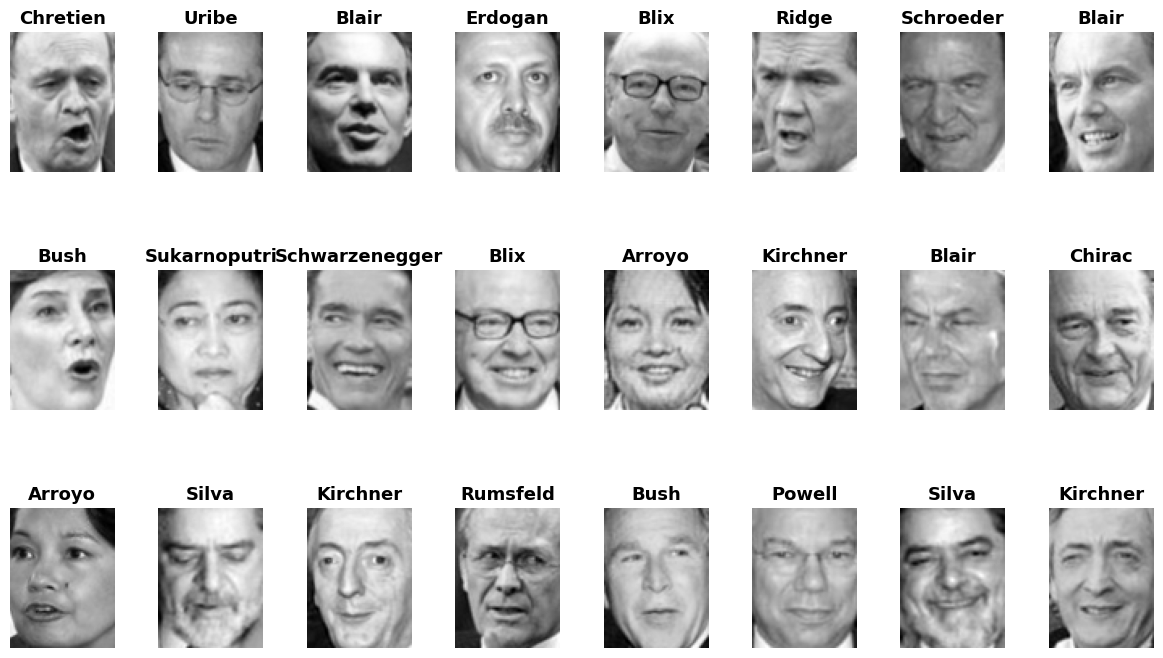

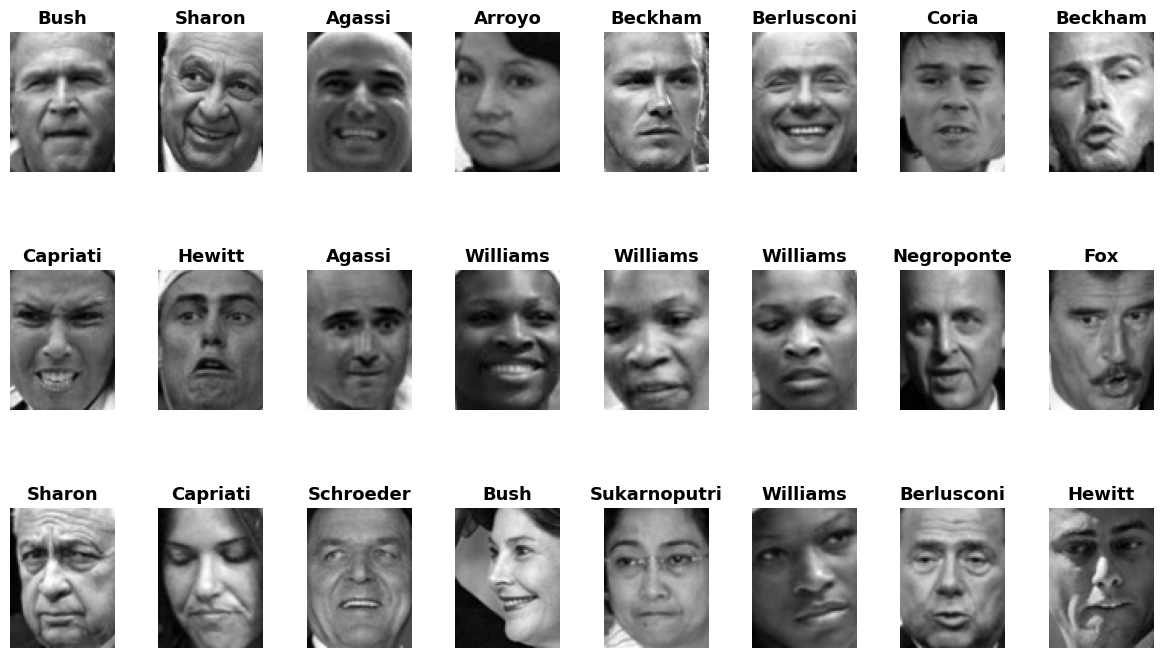

In [71]:
def show_people_by_cluster(cluster, algo, nbr_colonne=1, wsize=3):
    """
    Montre les images des personnes dans un cluster donné
    L'algorithme trie les images par distance au centre du cluster

    cluster : numéro du cluster
    algo : algorithme de clustering
    nbr_colonne : nombre de colonne pour afficher les images
    wsize : taille des images
    """

    fig, axes = plt.subplots(
        nbr_colonne, 8, figsize=(15, wsize), subplot_kw={"xticks": (), "yticks": ()}
    )
    fig.subplots_adjust(hspace=0.7)

    same_cluster = np.where(algo.labels_ == cluster)[0]
    cluster_images = X_train[same_cluster]
    distances = pairwise_distances_argmin_min(
        X_train_pca[same_cluster], algo.cluster_centers_[cluster].reshape(1, -1)
    )
    sorted_index = np.argsort(distances[0])

    for i, idx in enumerate(sorted_index):
        img = cluster_images[idx]
        ax = axes.ravel()[i % (8 * nbr_colonne)]
        ax.imshow(img.reshape((87, 65)), cmap="gray")

        str_ = people.target_names[y_train[same_cluster[idx]]].split()[-1]
        ax.set_title(f"{str_}", fontdict={"fontsize": 13, "fontweight": "bold"})
        ax.axis("off")
    plt.show()


for i in range(3):
    show_people_by_cluster(i, list_algo[0], 3, 8)

##### Analyse pour un grand nombre de clusters

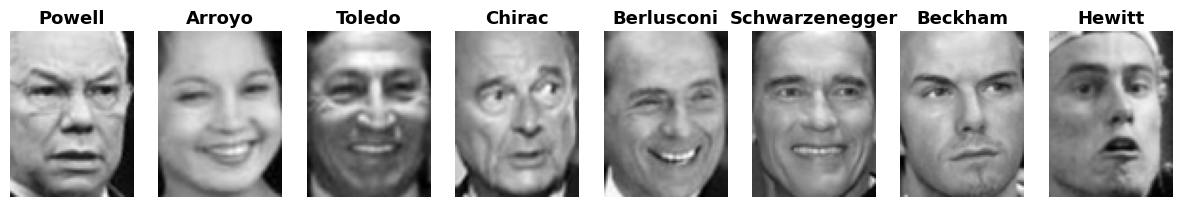

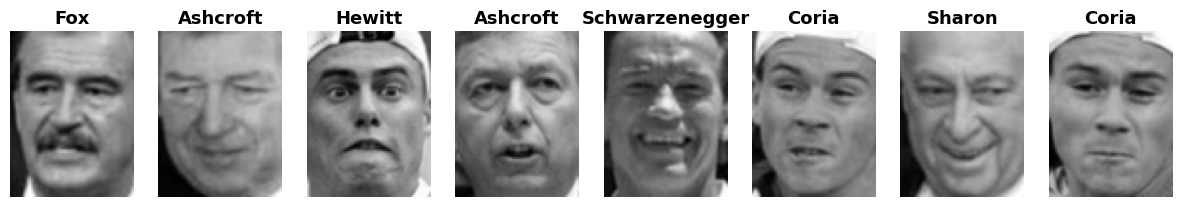

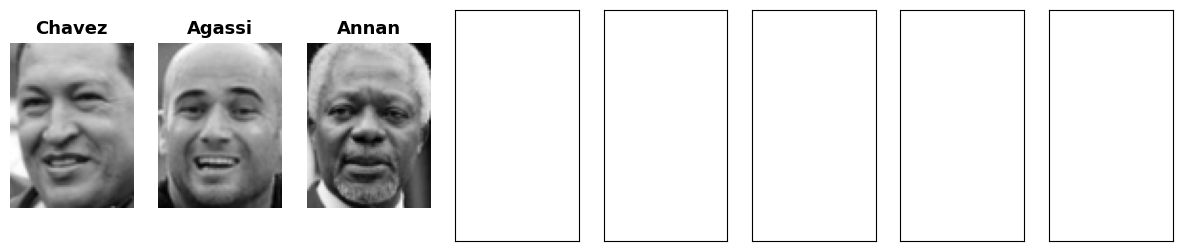

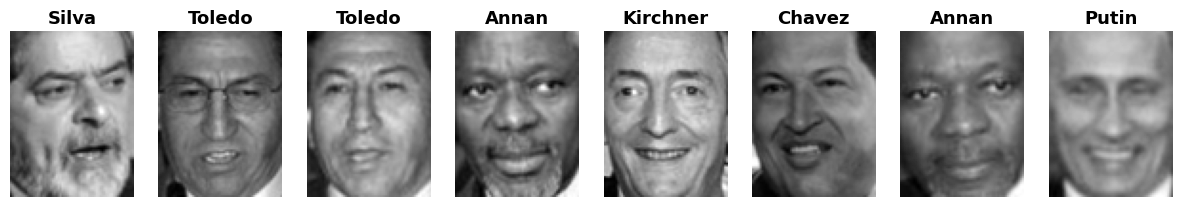

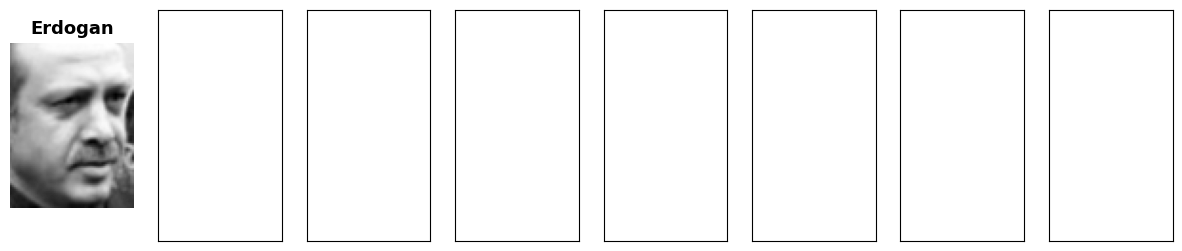

In [72]:
for i in [3, 40, 67, 78, 90]:
    show_people_by_cluster(i, list_algo[6])

##### Observations et conclusions

Pour un petit nombre de cluster, après avoir relancer plusieurs fois avec des seed différents, on a l'impression que la séparation des clusters ce faits plus sur un jeu entre la luminosité de l'image et son constraste. Alors que lorsque le nombre de clusters est plus grand, on a l'impression que la séparation ce fait plus sur les traits du visage et les expressions faciales des personnes.

### B) DBSCAN

Après avoir travaillé sur la méthode non-supervisée qu'est `KMeans` nous allons maintenant travailler sur une autre méthode de clustering, le `DBSCAN`. `DBSCAN` (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering utilisé pour regrouper des points de données similaires dans un ensemble de données. Comme son nom l'indique à la différence de `KMeans` il se base sur la densité des points d'un ensemble d'entrée. Les hyperparamètres de cet algorithme sont :
- La distance minimale $\varepsilon$ pour qu'un point soit aggloméré à un autre
- Le nombre de points minimum $MinPoints$ qui doivent se trouver dans une distance $\varepsilon$  pour qu'ils soient considérés comme clusters

In [99]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.utils import Bunch

In [100]:
people = fetch_lfw_people(min_faces_per_person=50, resize=0.7, color=False)

#### B).1 Prétraitement de la donnée

In [101]:
def get_x_y_set(people) -> tuple[np.ndarray, np.ndarray]:
    """
    Extrait un sous-ensemble du jeu de données d'entrée en sélectionnant un nombre limité d'instances par classe.

    Arguments:
        people: Jeu de données d'entrée.

    Retourne:
        tuple[np.ndarray, np.ndarray]: Un tuple contenant le sous-ensemble des données d'entrée (x_people) et les étiquettes correspondantes (y_people).
    """
    idx = np.zeros(people.target.shape, dtype=bool)

    # On sélectionne 50 premières instances de chaque classe
    for target in np.unique(people.target):
        idx[np.where(people.target == target)[0][:50]] = 1

    # On extrait les données correspondantes aux indexes
    x_people = people.data[idx]
    y_people = people.target[idx]
    return x_people, y_people

#### B).2 Calcul de la PCA

In [102]:
def compute_pca(x_people, n_components=100) -> np.ndarray:
    """_summary_

    Args:
        people : Dataset sur lequel porte l'étude
        n_components (int, optional): Nombre de composantes pour la PCA

    Returns:
        np.ndarray: L'application de la PCA à x_people
    """
    # Création d'un tableau booléen pour l'indexage des données du dataset

    # Création d'une instance de PCA avec le nombre de composantes que l'on a passé en argument
    pca = PCA(n_components=n_components, random_state=0, whiten=True).fit(x_people)
    # On applique la réduction de dimension sur `x_people`
    x_pca = pca.transform(x_people)
    return x_pca

#### B).3 Recherche des $\varepsilon$ et $MinPoints$

Le but est de trouver les $\varepsilon$ et $MinPoints$ qui donne un nombre de clusters assez élevé pour étudier le jeu de données mais également d'avoir de bons indices du `DBSCAN` tels que :
- **Le Coefficient de silhouette*** qui mesure à quel point chaque point de données est similaire à son propre groupe par rapport aux autres groupes un indice proche de 0 indique un chevauchement entre les groupes, et une valeur proche de -1 indique une mauvaise classification.<br>
- ***Indice de Davies-Bouldin** : Cet indice mesure la séparation entre les différents groupes, un faible indice indique un bon regroupement.<br>
- **L'ARI**  (Adjusted Rand Index)  mesure la similitude entre toutes les paires d'éléments dans deux patitions différentes. L'ARI renvoie une valeur entre -1 et 1, où 1 indique une correspondance parfaite entre les deux partitions, 0 indique une correspondance aléatoire et -1 indique une discordance totale. <br>

In [103]:
def search_best_eps(X_pca, y_people):
    results = []
    min_samples = 10
    for min_samples in range(3, 10):
        for eps in [6, 7, 8, 9, 10, 12, 13, 14]:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_pca)
            # print(np.bincount(labels + 1),))
            num_label = len(np.bincount(labels + 1))
            if num_label > 1:
                davies_bouldin = davies_bouldin_score(X_pca, labels)
                silhouette_avg = silhouette_score(X_pca, labels)
            else:
                davies_bouldin = -1
                silhouette_avg = -1

            ari = adjusted_rand_score(y_people, labels)

            cluster_count = len(np.unique(labels)) - 1
            noise_points = np.bincount(labels + 1)[0]
            cluster_distribution = np.bincount(labels + 1)[1:]

            result = {
                "min_samples": min_samples,
                "eps": eps,
                "cluster_count": cluster_count,
                "noise_points": noise_points,
                "nb_cluster_without_noise": len(cluster_distribution),
                "silhouette_avg": silhouette_avg,
                "davies_bouldin": davies_bouldin,
                "ari": ari,
            }
            results.append(result)

    df = pd.DataFrame(results)
    return df


x_people, y_people = get_x_y_set(people)
df = search_best_eps(compute_pca(x_people, n_components=110), y_people)

In [104]:
df[df["nb_cluster_without_noise"] >= 3].sort_values(by="nb_cluster_without_noise")

,min_samples,eps,cluster_count,noise_points,nb_cluster_without_noise,silhouette_avg,davies_bouldin,ari
1,3,7,3,585,3,-0.176669,2.961912,0.000913
10,4,8,3,551,3,-0.163618,5.620589,0.002105


On remarque pour $\varepsilon=7$  et $MinPoints=3$ on le nombre maximum de cluster et un bon indice de `davies_bouldin`. Nous allons choisir de nous baser sur le DBSCAN qui regroupe le plus de clusters afin d'observer la variation de données partitionnées.

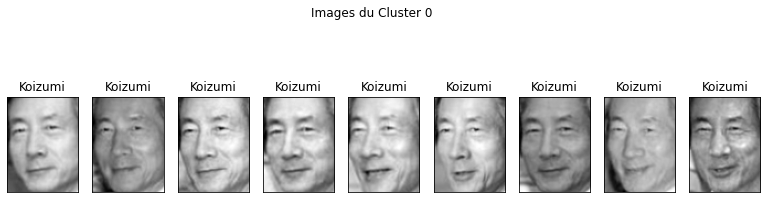

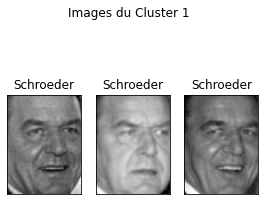

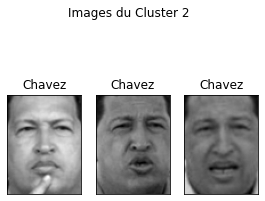

In [105]:
def visualize_clusters(
    people: Bunch, min_samples: int = 3, eps: int = 7, n_components: int = 100
):
    """
    Visualise les clusters dans le jeu de données d'entrée en utilisant DBSCAN.

    Args:
        people: Jeu de données d'entrée.
        min_samples (int, optionnel): Le nombre minimum d'échantillons dans un voisinage pour qu'un point soit considéré comme un point central.
        eps (int, optionnel): La distance maximale entre deux échantillons pour qu'ils soient considérés comme appartenant au même voisinage.
        n_components (int, optionnel): Nombre de composantes pour la PCA. Par défaut, 100.
    """
    # Calcul de PCA pour obtenir les données transformées
    x_people, y_people = get_x_y_set(people)
    x_pca = compute_pca(x_people, n_components)

    # Création d'une instance de DBSCAN avec les paramètres spécifiés
    dbscan = DBSCAN(min_samples=min_samples, eps=eps, n_jobs=-1)
    # Prédiction des étiquettes de cluster en utilisant les données transformées
    labels_pca = dbscan.fit_predict(x_pca)

    # Parcours de chaque cluster
    for cluster in range(labels_pca.max() + 1):
        # Sélection des instances appartenant au cluster actuel
        idx = labels_pca == cluster
        # Limite du nombre d'images à afficher pour éviter une surcharge
        n_images = min(15, np.sum(idx))
        # Taille d'une image pour la visualisation
        image_size = people.images[0].shape
        # Création d'une figure avec des sous-graphiques pour chaque image
        fig, axes = plt.subplots(
            1,
            n_images,
            figsize=(n_images * 1.5, 4),
            subplot_kw={"xticks": (), "yticks": ()},
        )
        fig.set_facecolor("white")
        fig.suptitle(f"Images du Cluster {cluster}")
        # Affichage des images et des étiquettes correspondantes
        for image, label, ax in zip(x_people[idx], y_people[idx], axes.ravel()):
            ax.imshow(image.reshape(image_size))
            ax.set_title(people.target_names[label].split()[-1])

    # Affichage des images en niveaux de gris
    plt.gray()
    # Affichage de la figure
    plt.show()
    return x_people, y_people


# Exemple d'utilisation
eps = 7
min_samples = 3
# On va ici appliquer un réduction de dimension à 110
x_people, y_people = visualize_clusters(
    people, eps=eps, min_samples=min_samples, n_components=110
)

#### Observations
On remarque que pour les 3 clusters la classification des célébrités est homogène.

#### Critiques sur le modèle

Ce modèle ne semble visiblement pas efficace pour le partionnement des données, le clustering a certe identifié les visages de manière homogène mais ce n'est qu'une infime partie du dataset. Comme on peut le voir ci-dessous.

In [106]:
for clustered_names in ["Gerhard Schroeder", "Junichiro Koizumi", "Hugo Chavez"]:
    clustered_index = np.where(people.target_names == clustered_names)[0]
    print(
        f"Le dataset contient {len(people.target[people.target == clustered_index])} images de {clustered_names}"
    )

Le dataset contient 109 images de Gerhard Schroeder
Le dataset contient 60 images de Junichiro Koizumi
Le dataset contient 71 images de Hugo Chavez
